In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from numpy.ma.core import sqrt

## **a) Descripción de la base de datos.**

> ### Describir la base de datos a utilizar, así como la fuente de la misma.

In [3]:
sns.set()
df = pd.read_csv('seeds_dataset.csv')
df

,a,p,c,lk,wk,ac,lkg,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Canadian
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Canadian
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Canadian
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Canadian


## **b) Tipos de atributos.**

> ### Describir los atributos de la base de datos y el tipo de dato de cada uno de los atributos.
> ### Graficar la distribución de datos.

| # |  Columna  | Elementos |    Tipo de dato    |
|---|-----------|-----------|--------------------|
| 0 |     a     |    210    |   Real (Float64)   |
| 1 |     p     |    210    |   Real (Float64)   |
| 2 |     c     |    210    |   Real (Float64)   |
| 3 |     lk    |    210    |   Real (Float64)   |
| 4 |     wk    |    210    |   Real (Float64)   |
| 5 |     ac    |    210    |   Real (Float64)   |
| 6 |     lkg   |    210    |   Real (Float64)   |
| 7 |     class |    210    |  Nominal (String)  |

Total de elementos indexados: **210 elementos, de 0 a 209.**</br>

Total de columnas: **8.**</br>

Dtypes:</br>
* Real (Float64): **7**.</br>
* Nominal (String): **1**.</br>

Uso de memoria: **13.2+ KB.**</br>


#### **Graficar la distribución de los datos.**

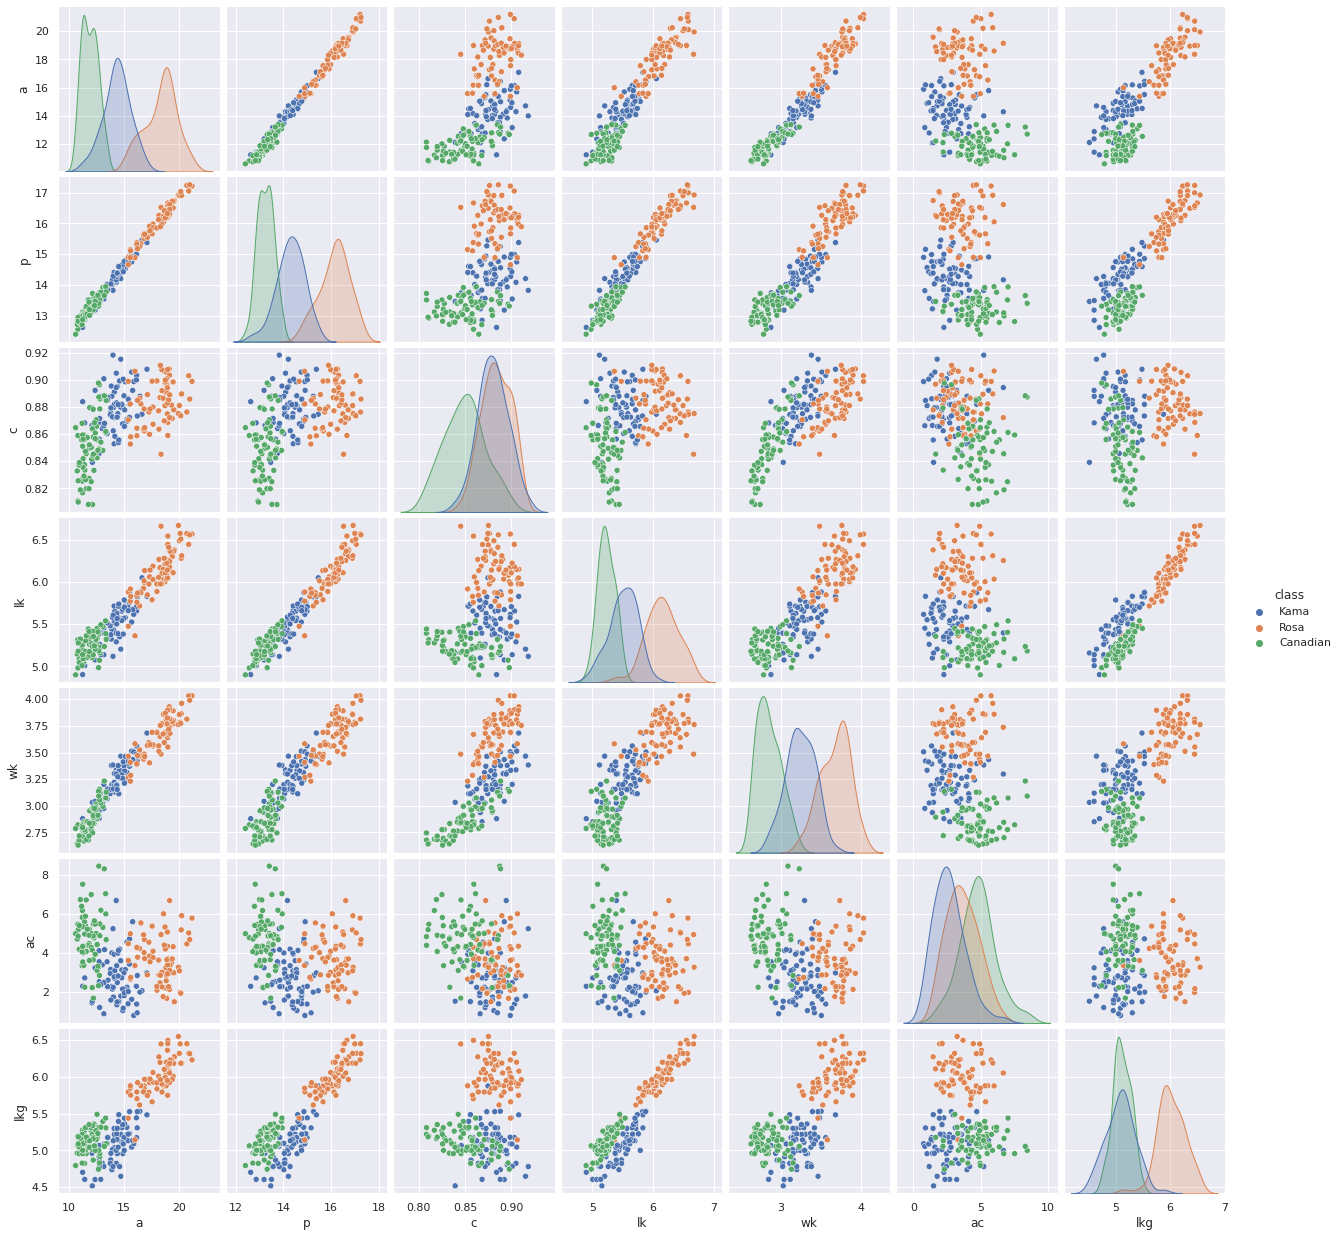

In [4]:
sns.pairplot(df, hue="class")

##### _**Distribución de atributos por clase.**_

##### 1. Area.

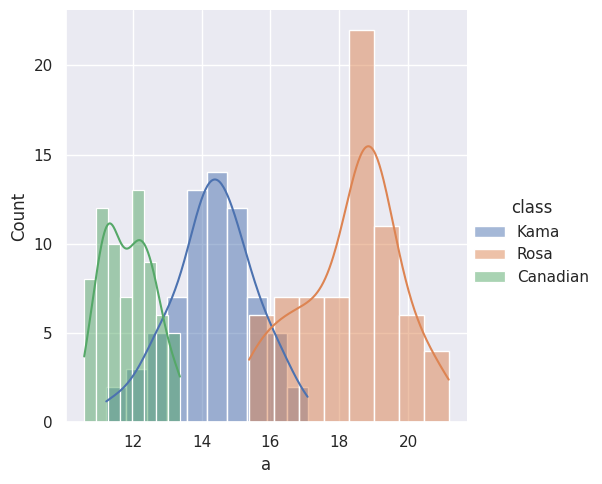

In [5]:
sns.FacetGrid(df, hue = "class", height=5)\
.map(sns.histplot, "a", kde = True)\
.add_legend()
plt.show()

##### 2. Perímetro.

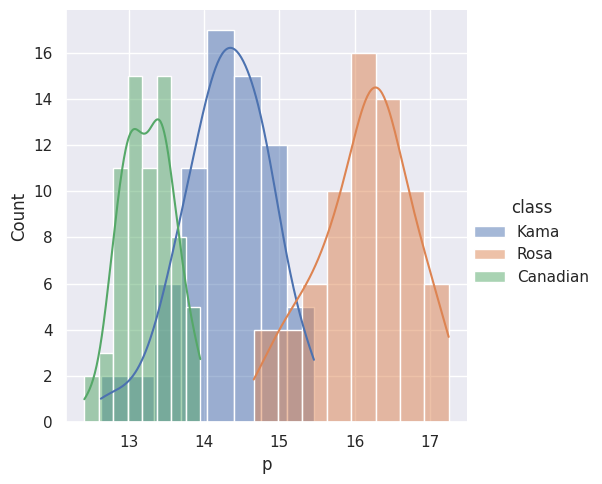

In [6]:
sns.FacetGrid(df, hue = "class", height=5)\
.map(sns.histplot, "p", kde = True)\
.add_legend()
plt.show()

##### 3. Compacidad.

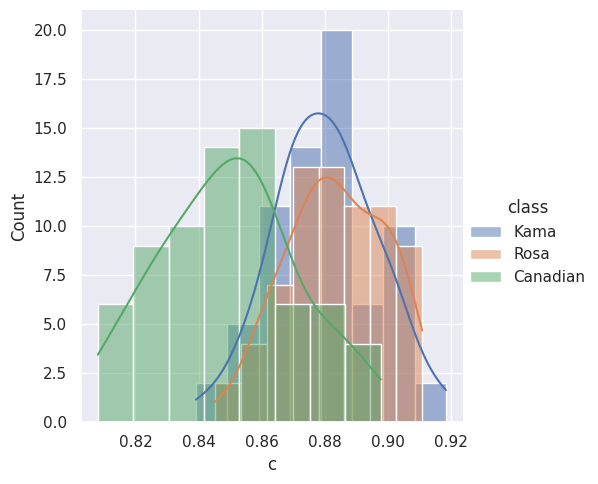

In [7]:
sns.FacetGrid(df, hue = "class", height=5)\
.map(sns.histplot, "c", kde = True)\
.add_legend()
plt.show()

##### 4. Longitud del grano.

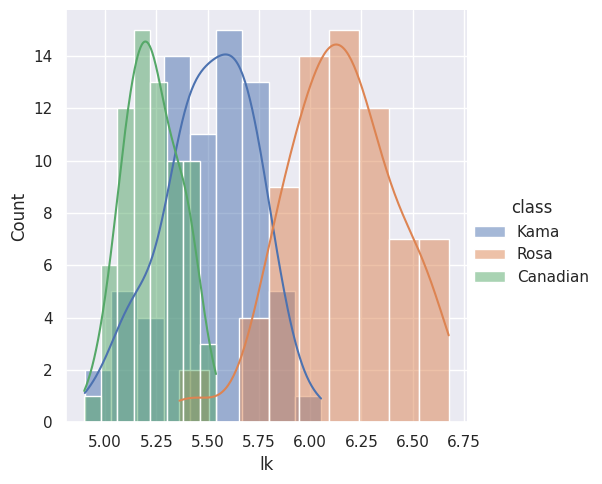

In [8]:
sns.FacetGrid(df, hue = "class", height=5)\
.map(sns.histplot, "lk", kde = True)\
.add_legend()
plt.show()

##### 5. Ancho del grano.

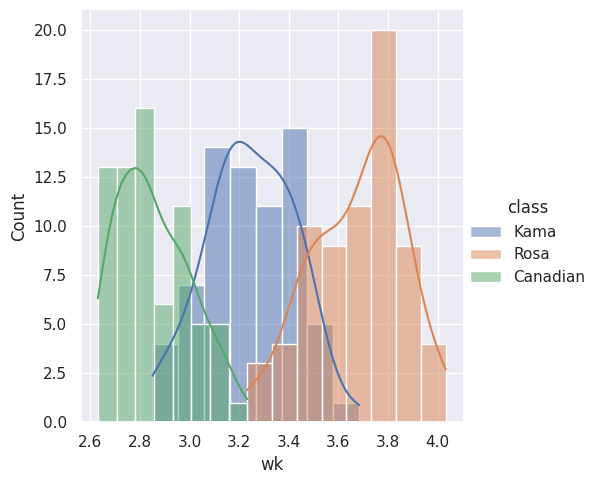

In [9]:
sns.FacetGrid(df, hue = "class", height=5)\
.map(sns.histplot, "wk", kde = True)\
.add_legend()
plt.show()

##### 6. Coeficiente de asimetría.

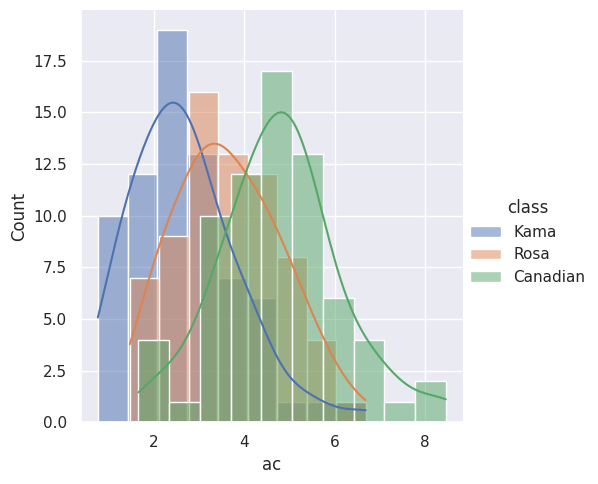

In [10]:

sns.FacetGrid(df, hue = "class", height=5)\
.map(sns.histplot, "ac", kde = True)\
.add_legend()
plt.show()

##### 7. Longitud de la ranura del grano.

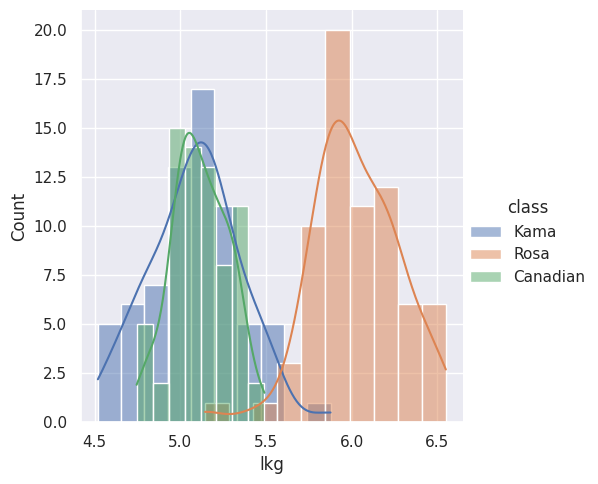

In [11]:
sns.FacetGrid(df, hue = "class", height=5)\
.map(sns.histplot, "lkg", kde = True)\
.add_legend()
plt.show()

## **b) Medidas de tendencia central.**

> #### Calcular la media, mediana y moda para cada uno de los atributos de la base de datos.

#### **Media y mediana.**

In [12]:
df.agg(['mean', 'median'])

/tmp/ipykernel_2519/1257963662.py:1: FutureWarning: ['class'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(['mean', 'median'])


,a,p,c,lk,wk,ac,lkg
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
median,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000


#### **Moda.**

In [13]:
df.mode()

,a,p,c,lk,wk,ac,lkg,class
0,11.23,13.47,0.8823,5.236,3.026,2.129,5.001,Canadian
1,14.11,NaN,NaN,5.395,NaN,2.221,NaN,Kama
2,15.38,NaN,NaN,NaN,NaN,2.700,NaN,Rosa


## **c) Medidas de dispersión.**

> ### Calcular el rango, los cuartiles, la varianza, la desviación estándar y el rango intercuartílico para cada atributo de la base de datos. 
> ### Calcular la matriz de correlación y covarianza de la base de datos.

#### **Rango.**

In [14]:
df.groupby('class').agg(['min', 'max'])

a             p              c             lk            wk  \
            min    max    min    max     min     max    min    max    min   
class                                                                       
Canadian  10.59  13.37  12.41  13.95  0.8081  0.8977  4.899  5.541  2.630   
Kama      11.23  17.08  12.63  15.46  0.8392  0.9183  4.902  6.053  2.850   
Rosa      15.38  21.18  14.66  17.25  0.8452  0.9108  5.363  6.675  3.231   

                     ac           lkg         
            max     min    max    min    max  
class                                         
Canadian  3.232  1.6610  8.456  4.745  5.491  
Kama      3.683  0.7651  6.685  4.519  5.877  
Rosa      4.033  1.4720  6.682  5.144  6.550

#### **Varianza y desviación estándar.**

#### **Cuartiles.**

In [15]:
q25 = df.quantile(.25)
q50 = df.quantile()
q75 = df.quantile(.75)

pd.DataFrame({
    '25%': q25,
    '50%': q50,
    '75%': q75
})


,25%,50%,75%
a,12.27000,14.35500,17.305000
p,13.45000,14.32000,15.715000
c,0.85690,0.87345,0.887775
lk,5.26225,5.52350,5.979750
wk,2.94400,3.23700,3.561750
ac,2.56150,3.59900,4.768750
lkg,5.04500,5.22300,5.877000


#### **Rango intercuartílico.**

##### 1. Area.

In [16]:
q3, q1 = np.percentile(df['a'], [75, 25])
iqr = q3 - q1
print('Límite intercuartílico del Area es: ', iqr)

Límite intercuartílico del Area es:  5.035


##### 2. Perímetro.

In [17]:
q3, q1 = np.percentile(df['p'], [75, 25])
iqr = q3 - q1
print('Límite intercuartílico del Perímetro es: ', iqr)

Límite intercuartílico del Perímetro es:  2.2650000000000006


##### 3. Compacidad.

In [18]:
q3, q1 = np.percentile(df['c'], [75, 25])
iqr = q3 - q1
print('Límite intercuartílico de la Compacidad es: ', iqr)

Límite intercuartílico de la Compacidad es:  0.030874999999999986


##### 4. Longitud del grano.

In [19]:
q3, q1 = np.percentile(df['lk'], [75, 25])
iqr = q3 - q1
print('Límite intercuartílico de la Longitud del grano es: ', iqr)

Límite intercuartílico de la Longitud del grano es:  0.7175000000000002


##### 5. Anchura del grano.

In [20]:
q3, q1 = np.percentile(df['wk'], [75, 25])
iqr = q3 - q1
print('Límite intercuartílico del Ancho del grano es: ', iqr)

Límite intercuartílico del Ancho del grano es:  0.61775


##### 6. Coeficiente de asimetría.

In [21]:
q3, q1 = np.percentile(df['ac'], [75, 25])
iqr = q3 - q1
print('Límite intercuartílico del Coeficiente de asimetría es: ', iqr)

Límite intercuartílico del Coeficiente de asimetría es:  2.2072499999999997


##### 7. Longitud de la ranura del grano.

In [22]:
q3, q1 = np.percentile(df['lkg'], [75, 25])
iqr = q3 - q1
print('Límite intercuartílico de la Longitud de la ranura del grano es: ', iqr)

Límite intercuartílico de la Longitud de la ranura del grano es:  0.8319999999999999


#### **Matríz de correlación.**

In [23]:
df.corr()

,a,p,c,lk,wk,ac,lkg
a,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
p,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
c,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
lk,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
wk,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
ac,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
lkg,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


<AxesSubplot:>

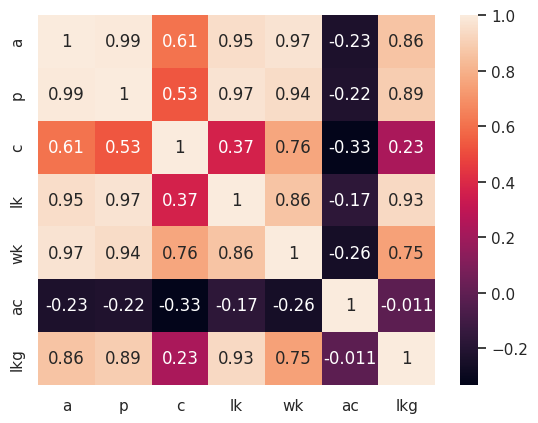

In [24]:
sns.heatmap(df.corr(), annot=True)

#### **Matríz de covarianza.**

In [25]:
df.cov()

,a,p,c,lk,wk,ac,lkg
a,8.466351,3.778443,0.041823,1.224704,1.066911,-1.004356,1.235133
p,3.778443,1.705528,0.016332,0.562666,0.466065,-0.426766,0.571753
c,0.041823,0.016332,0.000558,0.003852,0.006798,-0.011777,0.002634
lk,1.224704,0.562666,0.003852,0.196305,0.143992,-0.114290,0.203125
wk,1.066911,0.466065,0.006798,0.143992,0.142668,-0.146543,0.139068
ac,-1.004356,-0.426766,-0.011777,-0.114290,-0.146543,2.260684,-0.008187
lkg,1.235133,0.571753,0.002634,0.203125,0.139068,-0.008187,0.241553


<AxesSubplot:>

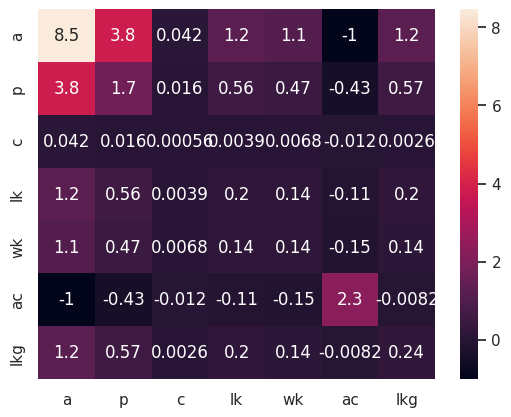

In [26]:
sns.heatmap(df.cov(), annot=True)

## **e) Diagramas de caja y valores atípicos.**

> ### Calcular los diagramas de caja y los valores atípicos para cada uno de los atributos de la base de datos.
> ### Especificar las tuplas o registros que son considerados valores atípicos. 

#### **Graficar los dragramas de caja para todos los atributos.**

<AxesSubplot:xlabel='class', ylabel='lkg'>

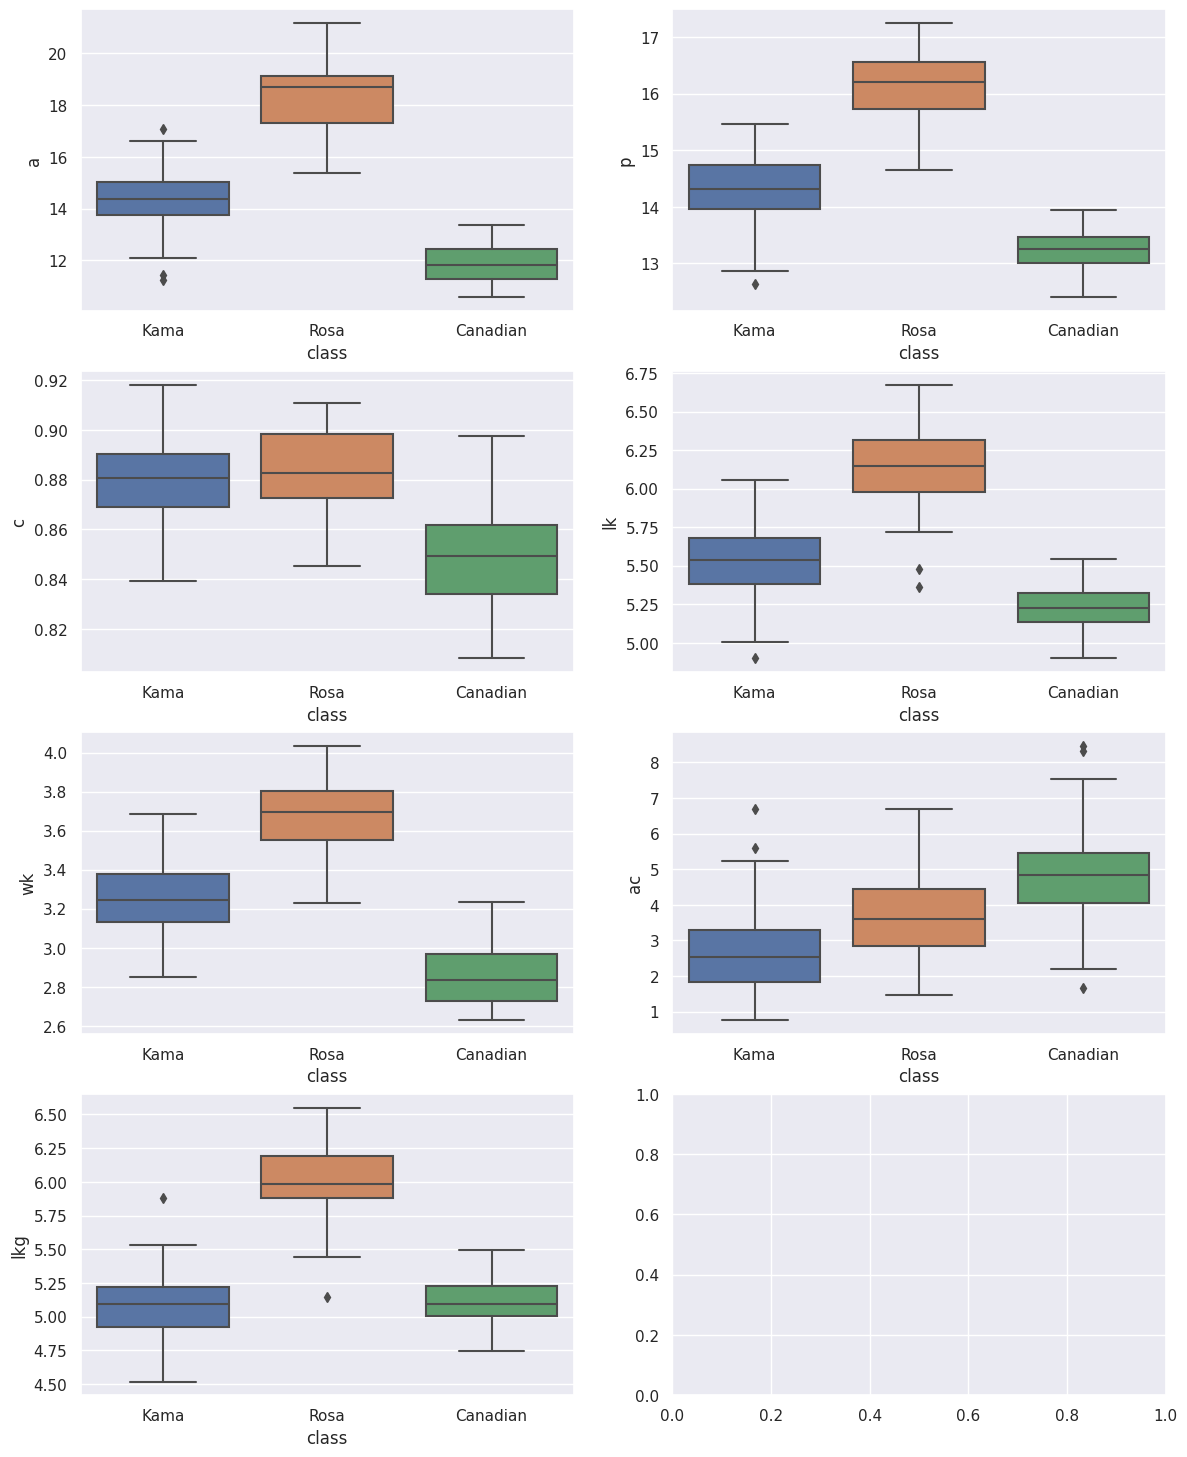

In [27]:
fig, axes = plt.subplots(4,2, figsize=(14, 18))
sns.boxplot(y="a",   x="class", data=df, orient="v", ax=axes[0, 0])
sns.boxplot(y="p",   x="class", data=df, orient="v", ax=axes[0, 1])
sns.boxplot(y="c",   x="class", data=df, orient="v", ax=axes[1, 0])
sns.boxplot(y="lk",  x="class", data=df, orient="v", ax=axes[1, 1])
sns.boxplot(y="wk",  x="class", data=df, orient="v", ax=axes[2, 0])
sns.boxplot(y="ac",  x="class", data=df, orient="v", ax=axes[2, 1])
sns.boxplot(y="lkg", x="class", data=df, orient="v", ax=axes[3, 0])

In [28]:
def find_outliers(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    IQR = q3 - q1
    ll = q1 - (1.5*IQR)
    ul = q3 + (1.5*IQR)
    for v in col.values:
        if v < ll or v > ul:
            print("Outlier")
    # upper_outliers = col[col > ul].index.tolist()
    # lower_outliers = col[col < ll].index.tolist()
    # bad_indices = list(set(upper_outliers + lower_outliers))
    # return [bad_indices, col.name]

bad_indexes = []
for col in df.columns:
    if df[col].dtype in ["int64","float64"]:
        bad_indexes.append(find_outliers(df[col].sort_values()))

# bad_indexes = list(np.concatenate(bad_indexes).flat)
# bad_indexes

Outlier
Outlier
Outlier
Outlier
Outlier


## **f) Regresión lineal.**

> ### Calcular los valores de la regresión lineal (coeficientes y cruces de las líneas, coeficiente de determinación y correlación).
> ### Graficar la distribución de los datos con su respectiva línea de regresión.

#### **Area.**

##### ***1. Area - Compacidad.***

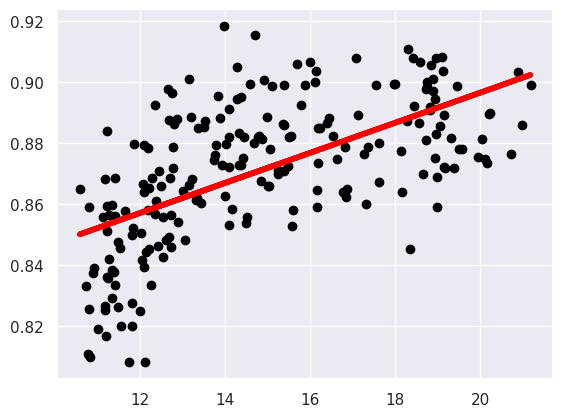

In [29]:
regressor = LinearRegression()
X = df['a'].values.reshape(-1, 1)
Y = df['c'].values.reshape(-1, 1)
regressor.fit(X, Y)
plt.scatter(df["a"], df["c"], color="black")
plt.plot(X, regressor.predict(X), color="red", linewidth=4)
plt.show()


Coeficiente de intercepción.

In [30]:
regressor.intercept_

array([0.79765392])

Valor de regresión.

In [31]:
regressor.coef_

array([[0.00493986]])

Coeficiente de determinación.

In [32]:
coef_deter = regressor.score(X, Y)
coef_deter

0.3700147959256693

Coeficiente de correlación.

In [33]:
sqrt(coef_deter)

0.6082884150842175

##### ***2. Area - Longitud del grano.***

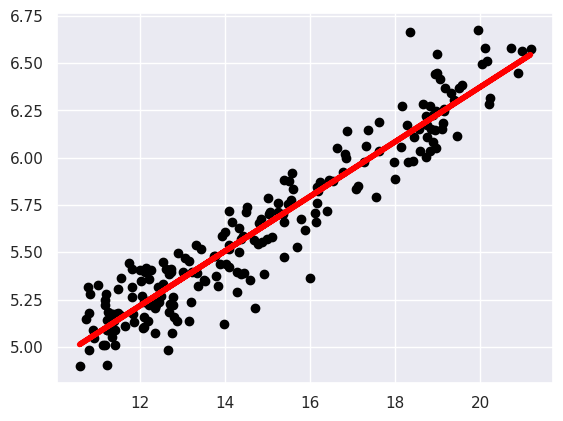

In [34]:
regressor = LinearRegression()
X = df['a'].values.reshape(-1, 1)
Y = df['lk'].values.reshape(-1, 1)
regressor.fit(X, Y)
plt.scatter(df["a"], df["lk"], color="black")
plt.plot(X, regressor.predict(X), color="red", linewidth=4)
plt.show()

Coeficiente de intercepción.

In [35]:
regressor.intercept_

array([3.48075829])

Valor de regresión.

In [36]:
regressor.coef_

array([[0.14465544]])

Coeficiente de determincación.

In [37]:
coef_deter = regressor.score(X, Y)

Coeficiente de correlación.

In [38]:
sqrt(coef_deter)

0.9499854171022524

##### ***3. Area - Coeficiente de asimetría.***

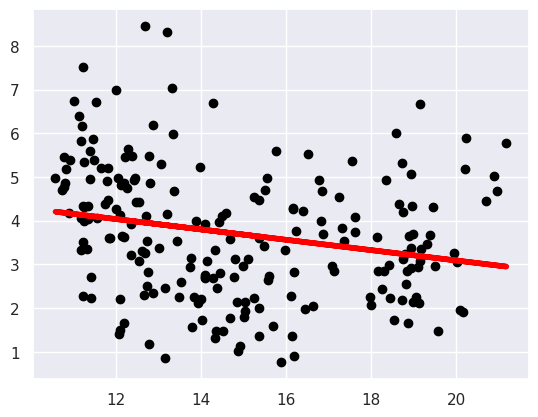

In [39]:
regressor = LinearRegression()
X = df['a'].values.reshape(-1, 1)
Y = df['ac'].values.reshape(-1, 1)
regressor.fit(X, Y)
plt.scatter(df["a"], df["ac"], color="black")
plt.plot(X, regressor.predict(X), color="red", linewidth=4)
plt.show()

Coeficiente de intercepción.

In [40]:
regressor.intercept_

array([5.46154982])

Valor de regresión.

In [41]:
regressor.coef_

array([[-0.11862913]])

Coeficiente de determinación.

In [42]:
coef_deter = regressor.score(X, Y)

Coeficiente de correlación.

In [43]:
sqrt(coef_deter)

0.2295723328291978

##### ***4. Area - Longitud de la ranura del grano.***

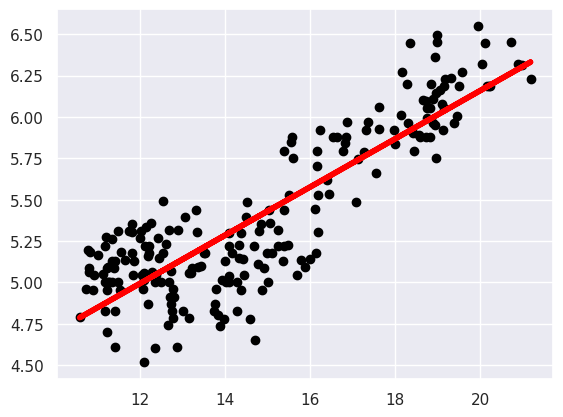

In [44]:
regressor = LinearRegression()
X = df['a'].values.reshape(-1, 1)
Y = df['lkg'].values.reshape(-1, 1)
regressor.fit(X, Y)
plt.scatter(df["a"], df["lkg"], color="black")
plt.plot(X, regressor.predict(X), color="red", linewidth=4)
plt.show()

Coeficiente de intercepción.

In [45]:
regressor.intercept_

array([3.24200653])

Valor de regresión.

In [46]:
regressor.coef_

array([[0.14588728]])

Coeficiente de determinación.

In [47]:
coef_deter = regressor.score(X, Y)
coef_deter

0.7459651597852399

Coeficiente de correlación.

In [48]:
sqrt(coef_deter)

0.8636927461691686

#### **Compacidad.**

##### ***1. Compacidad - Area.***

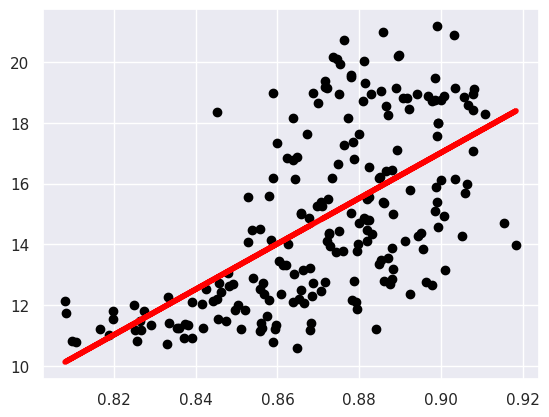

In [49]:
regressor = LinearRegression()
X = df['c'].values.reshape(-1, 1)
Y = df['a'].values.reshape(-1, 1)
regressor.fit(X, Y)
plt.scatter(df["c"], df["a"], color="black")
plt.plot(X, regressor.predict(X), color="red", linewidth=4)
plt.show()

Coeficiente de intercepación.

In [50]:
regressor.intercept_

array([-50.39370288])

Valor de regresión.

In [51]:
regressor.coef_

array([[74.90394224]])

Coeficiente de determinación.

In [52]:
coef_deter = regressor.score(X, Y)

Coeficiente de correlación.

In [53]:
sqrt(coef_deter)

0.6082884150842176

##### ***2. Compacidad - Longitud del grano.***

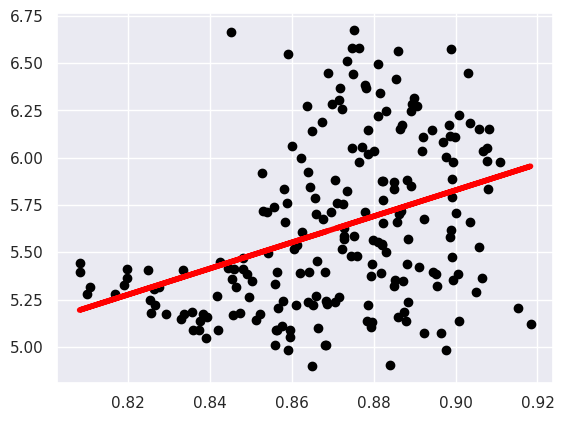

In [54]:
regressor = LinearRegression()
X = df['c'].values.reshape(-1, 1)
Y = df['lk'].values.reshape(-1, 1)
regressor.fit(X, Y)
plt.scatter(df["c"], df["lk"], color="black")
plt.plot(X, regressor.predict(X), color="red", linewidth=4)
plt.show()

Coeficiente intercepción.

In [55]:
regressor.intercept_

array([-0.38013269])

Valor de regresión.

In [56]:
regressor.coef_

array([[6.89859458]])

Coeficiente de determinación.

In [57]:
coef_deter = regressor.score(X, Y)

Coeficiente de correlación.

In [58]:
sqrt(coef_deter)

0.367915148187136

##### ***3. Compacidad - Coeficiente de asimetría.***

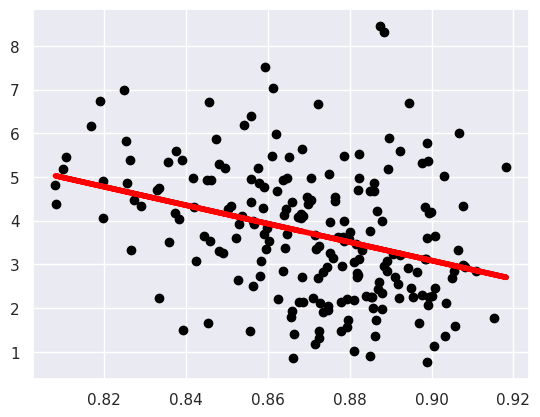

In [59]:
regressor = LinearRegression()
X = df['c'].values.reshape(-1, 1)
Y = df['ac'].values.reshape(-1, 1)
regressor.fit(X, Y)
plt.scatter(df["c"], df["ac"], color="black")
plt.plot(X, regressor.predict(X), color="red", linewidth=4)
plt.show()

Coeficiente de intersección.

In [60]:
regressor.intercept_

array([22.07107217])

Valor de regresión.

In [82]:
regressor.coef_

array([[-0.03389339]])

Coeficiente de determinación.

In [84]:
coef_deter = regressor.score(X, Y)
coef_deter

0.00012274467787620758

Coeficiente de correlación.

In [85]:
sqrt(coef_deter)

0.01107901971639222

##### ***4. Compacidad - Longitud de la ranura del grano.***

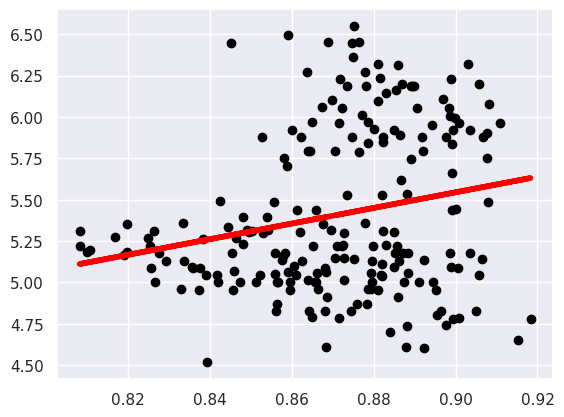

In [61]:
regressor = LinearRegression()
X = df['c'].values.reshape(-1, 1)
Y = df['lkg'].values.reshape(-1, 1)
regressor.fit(X, Y)
plt.scatter(df["c"], df["lkg"], color="black")
plt.plot(X, regressor.predict(X), color="red", linewidth=4)
plt.show()

Coeficiente de intercepción.

In [62]:
regressor.intercept_

array([1.29883328])

Valor de regresión.

In [63]:
regressor.coef_

array([[4.71784718]])

Coeficiente de determinación.

In [64]:
coef_deter = regressor.score(X, Y)
coef_deter

0.05144949949612221

Coeficiente de correlación.

In [65]:
sqrt(coef_deter)

0.22682482116409175

#### **Longitud de la ranura.**

##### ***1. Longitud del grano - Area.***

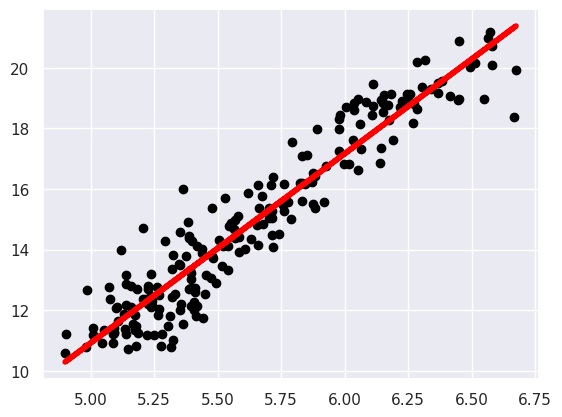

In [66]:
regressor = LinearRegression()
X = df['lk'].values.reshape(-1, 1)
Y = df['a'].values.reshape(-1, 1)
regressor.fit(X, Y)
plt.scatter(df["lk"], df["a"], color="black")
plt.plot(X, regressor.predict(X), color="red", linewidth=4)
plt.show()

Coeficiente de intersección.

In [86]:
regressor.intercept_

array([3.88349881])

Valor de regresión.

In [87]:
regressor.coef_

array([[-0.03389339]])

Coeficiente de determinación.

In [89]:
coef_deter = regressor.score(X, Y)
coef_deter

0.00012274467787620758

Coeficiente de correlación.

In [90]:
sqrt(coef_deter)

0.01107901971639222

##### ***2. Longitud del grano - Compacidad.***

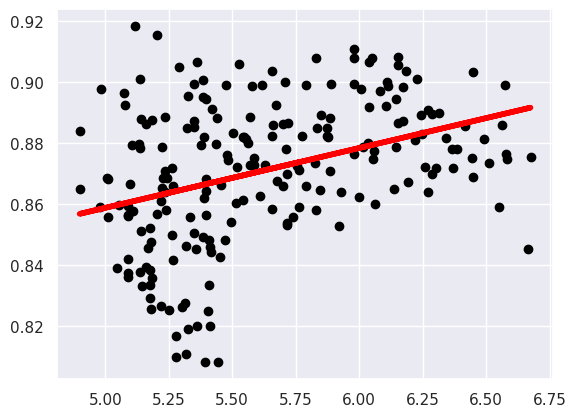

In [67]:
regressor = LinearRegression()
X = df['lk'].values.reshape(-1, 1)
Y = df['c'].values.reshape(-1, 1)
regressor.fit(X, Y)
plt.scatter(df["lk"], df["c"], color="black")
plt.plot(X, regressor.predict(X), color="red", linewidth=4)
plt.show()

Coeficiente de intersección

In [91]:
regressor.intercept_

array([3.88349881])

Valor de regresión.

In [92]:
regressor.coef_

array([[-0.03389339]])

Coeficiente de determinación.

In [94]:
coef_deter = regressor.score(X, Y)
coef_deter

0.00012274467787620758

Coeficiente de correlación.

In [95]:
sqrt(coef_deter)

0.01107901971639222

##### ***3. Longitud del grano - Coeficiente de asimetría.***

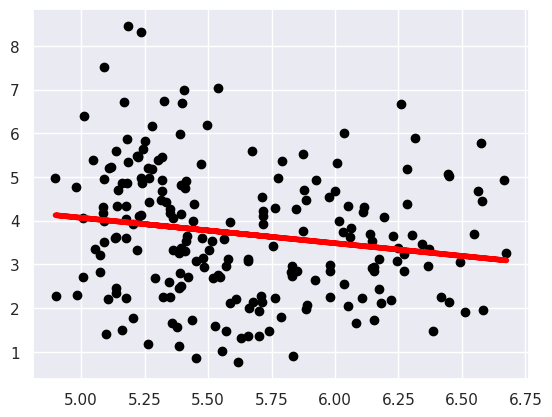

In [68]:
regressor = LinearRegression()
X = df['lk'].values.reshape(-1, 1)
Y = df['ac'].values.reshape(-1, 1)
regressor.fit(X, Y)
plt.scatter(df["lk"], df["ac"], color="black")
plt.plot(X, regressor.predict(X), color="red", linewidth=4)
plt.show()

Coeficiente de intersección.

In [96]:
regressor.intercept_

array([3.88349881])

Valor de regresión.

In [97]:
regressor.coef_

array([[-0.03389339]])

Coeficiente de determinación.

In [98]:
coef_deter = regressor.score(X, Y)
coef_deter

0.00012274467787620758

Coeficiente de correlación.

In [99]:
sqrt(coef_deter)

0.01107901971639222

##### ***4. Longitud del grano - Longitud de la ranura del grano.***

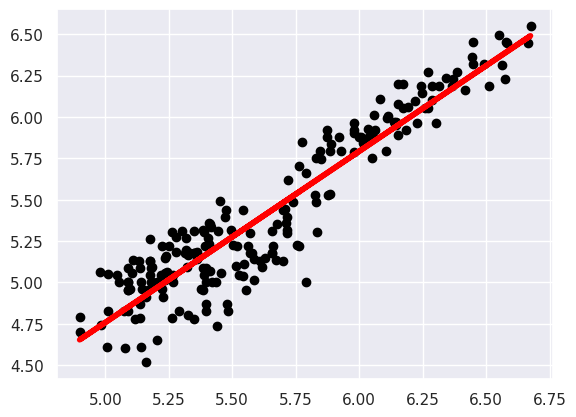

In [69]:
regressor = LinearRegression()
X = df['lk'].values.reshape(-1, 1)
Y = df['lkg'].values.reshape(-1, 1)
regressor.fit(X, Y)
plt.scatter(df["lk"], df["lkg"], color="black")
plt.plot(X, regressor.predict(X), color="red", linewidth=4)
plt.show()

Coeficiente de intersección.

In [101]:
regressor.intercept_

array([3.88349881])

Valor de regresión.

In [102]:
regressor.coef_

array([[-0.03389339]])

Coeficiente de determinación.

In [104]:
coef_deter = regressor.score(X, Y)
coef_deter

0.00012274467787620758

Coeficiente de correlación.

In [105]:
sqrt(coef_deter)

0.01107901971639222

#### **Coeficiente de asimetría.**

##### ***1. Coeficiente de asimetría - Area.***

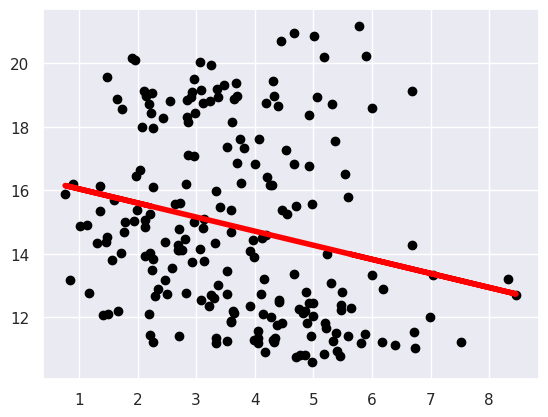

In [70]:
regressor = LinearRegression()
X = df['ac'].values.reshape(-1, 1)
Y = df['a'].values.reshape(-1, 1)
regressor.fit(X, Y)
plt.scatter(df["ac"], df["a"], color="black")
plt.plot(X, regressor.predict(X), color="red", linewidth=4)
plt.show()

##### ***2. Coeficiente de asimetría - Compacidad.***

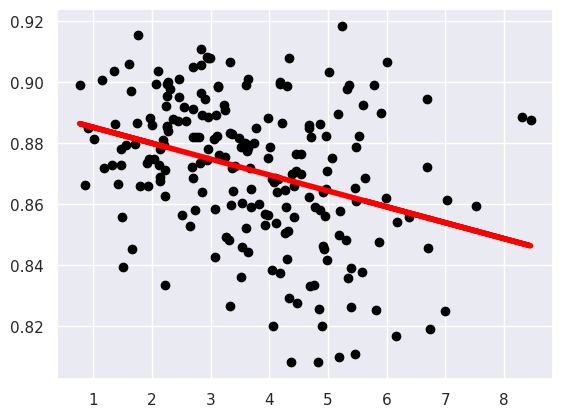

In [71]:
regressor = LinearRegression()
X = df['ac'].values.reshape(-1, 1)
Y = df['c'].values.reshape(-1, 1)
regressor.fit(X, Y)
plt.scatter(df["ac"], df["c"], color="black")
plt.plot(X, regressor.predict(X), color="red", linewidth=4)
plt.show()

##### ***3. Coeficiente de asimetría - Longitud del grano.***

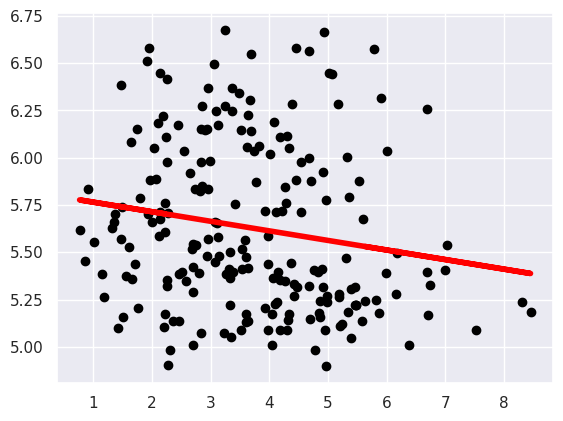

In [72]:
regressor = LinearRegression()
X = df['ac'].values.reshape(-1, 1)
Y = df['lk'].values.reshape(-1, 1)
regressor.fit(X, Y)
plt.scatter(df["ac"], df["lk"], color="black")
plt.plot(X, regressor.predict(X), color="red", linewidth=4)
plt.show()

##### ***4. Coeficiente de asimetría - Longitud de la ranura del grano.***

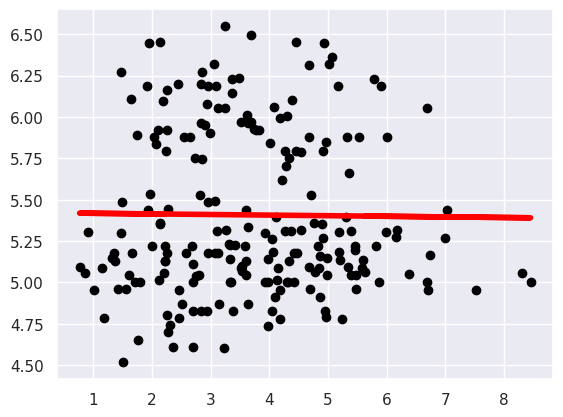

In [73]:
regressor = LinearRegression()
X = df['ac'].values.reshape(-1, 1)
Y = df['lkg'].values.reshape(-1, 1)
regressor.fit(X, Y)
plt.scatter(df["ac"], df["lkg"], color="black")
plt.plot(X, regressor.predict(X), color="red", linewidth=4)
plt.show()

#### **Longitud de la ranura del grano.**

##### ***1. Longitud de la ranura del grano - Area.***

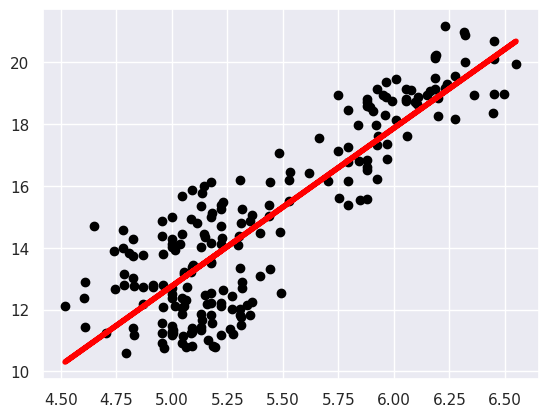

In [74]:
regressor = LinearRegression()
X = df['lkg'].values.reshape(-1, 1)
Y = df['a'].values.reshape(-1, 1)
regressor.fit(X, Y)
plt.scatter(df["lkg"], df["a"], color="black")
plt.plot(X, regressor.predict(X), color="red", linewidth=4)
plt.show()

##### ***2. Longitud de la ranura del grano - Compacidad.***

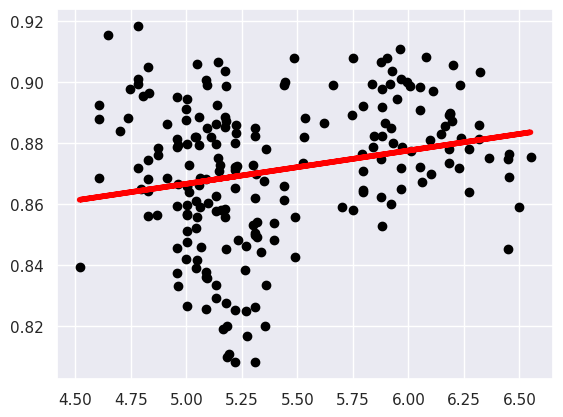

In [75]:
regressor = LinearRegression()
X = df['lkg'].values.reshape(-1, 1)
Y = df['c'].values.reshape(-1, 1)
regressor.fit(X, Y)
plt.scatter(df["lkg"], df["c"], color="black")
plt.plot(X, regressor.predict(X), color="red", linewidth=4)
plt.show()

##### ***3. Longitud de la ranura del grano - Longitud del grano.***

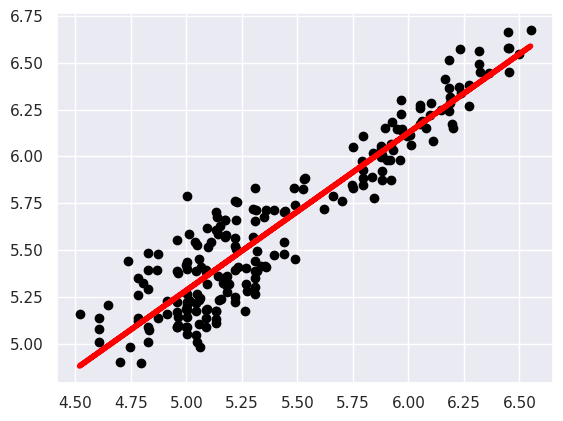

In [76]:
regressor = LinearRegression()
X = df['lkg'].values.reshape(-1, 1)
Y = df['lk'].values.reshape(-1, 1)
regressor.fit(X, Y)
plt.scatter(df["lkg"], df["lk"], color="black")
plt.plot(X, regressor.predict(X), color="red", linewidth=4)
plt.show()

##### ***4. Longitud de la ranura del grano - Coeficiente de asimetría.***

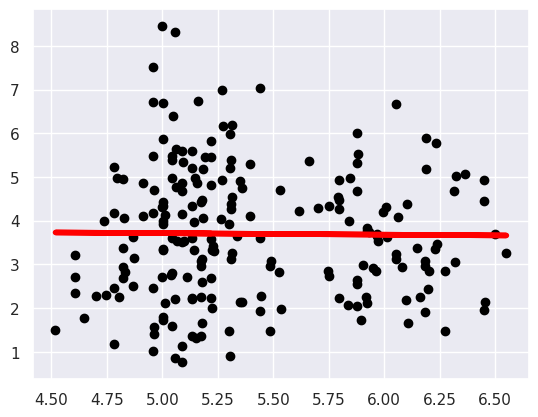

In [77]:
regressor = LinearRegression()
X = df['lkg'].values.reshape(-1, 1)
Y = df['ac'].values.reshape(-1, 1)
regressor.fit(X, Y)
plt.scatter(df["lkg"], df["ac"], color="black")
plt.plot(X, regressor.predict(X), color="red", linewidth=4)
plt.show()

## **h) Reglas de separación de patrones.**

> ### Crear un algoritmo con reglas IF-THEN-ELSE que permita separar lo mejor posible las clases de los patrones según el análisis estadístico realizado.

#### **Selección de atributo.**

El análisis estadístico permite conocer que el mejor atributo para clasificar patrones es **a (área)**, debido a que los valores pertenecientes a cada clase dentro de este atributo no presentan traslapes tan notorios como en otros; tal y como se muestra en la siguiente gráfica:

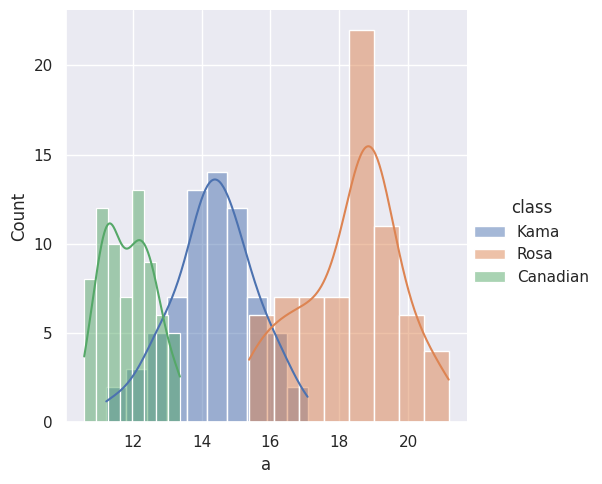

In [78]:
sns.FacetGrid(df, hue = "class", height=5)\
.map(sns.histplot, "a", kde = True)\
.add_legend()
plt.show()

In [79]:
arr = df.drop(['class', 'p', 'wk'], axis=1).columns
arr2 = df.drop(['class', 'p', 'wk'], axis=1).columns
np.array(np.meshgrid(arr, arr2)).T.reshape(-1, 2)

array([['a', 'a'],
       ['a', 'c'],
       ['a', 'lk'],
       ['a', 'ac'],
       ['a', 'lkg'],
       ['c', 'a'],
       ['c', 'c'],
       ['c', 'lk'],
       ['c', 'ac'],
       ['c', 'lkg'],
       ['lk', 'a'],
       ['lk', 'c'],
       ['lk', 'lk'],
       ['lk', 'ac'],
       ['lk', 'lkg'],
       ['ac', 'a'],
       ['ac', 'c'],
       ['ac', 'lk'],
       ['ac', 'ac'],
       ['ac', 'lkg'],
       ['lkg', 'a'],
       ['lkg', 'c'],
       ['lkg', 'lk'],
       ['lkg', 'ac'],
       ['lkg', 'lkg']], dtype=object)

#### **Código de clasificación con reglas IT-THEN-ELSE.**

In [80]:
classif = []
for i in df["a"]:
    if(i <= 13):
        classif.append('Canadian')
    elif(i <= 16):
        classif.append('Kama')
    else:
        classif.append('Rosa')

aciertos = sum(x == y for x, y in zip(df["class"], classif))

#### **Resultados.**

In [81]:
print("Rendimiento: ", aciertos/len(df["class"]) * 100,"%")

Rendimiento:  86.66666666666667 %
